<a href="https://colab.research.google.com/github/Shoterjust/SC2001-Projects/blob/main/Project%201/SMAC_grp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib.pyplot as plt
import time
import math

(a) Algorithm implementation

In [2]:
class Counter():
  def __init__(self):
    self.c = 0
  def add(self, k = 1):
    self.c += k

In [ ]:
def insertion_sort(n, cnt:Counter):
    for i in range(1, len(n)):
        for j in range(i, 0, -1):
            cnt.add(1)
            if n[j] < n[j-1]:
                n[j], n[j-1] = n[j-1], n[j]
            else:
                break
    return n

In [3]:
def merge(left, right, cnt:Counter):
    if left == [] or right == []:
      return left + right
    sorted_list = []

    while left != [] and right != []:
        left1, right1 = left[0], right[0]
        cnt.add(1)

        if left1 <= right1:
            sorted_list.append(left1)
            left = left[1:]
        else:
            sorted_list.append(right1)
            right = right[1:]

    return sorted_list + left + right

def merge_sort(n, cnt:Counter):
    if len(n) <= 1:
        return n

    mid = len(n) // 2
    left = merge_sort(n[:mid], cnt)
    right = merge_sort(n[mid:], cnt)
    return merge(left, right, cnt)

In [ ]:
def hybrid_sort(n, S, cnt:Counter):
    if len(n) <= S:
        return insertion_sort(n, cnt)

    else:
        mid = len(n) // 2
        left = hybrid_sort(n[:mid], S, cnt)
        right = hybrid_sort(n[mid:], S, cnt)
        return merge(left, right, cnt)

In [7]:
# Example for part (a)
def part_a():
    cnt_h = Counter()
    arr = [14, 40, 31, 28, 3, 15, 17, 51]
    sorted_arr = merge_sort(arr, cnt_h) # eg. let S=4
    print("Sorted array:", sorted_arr)
    print("Comparisons:", cnt_h.c)

part_a()

Sorted array: [3, 14, 15, 17, 28, 31, 40, 51]
Comparisons: 16


(b) Generate input data

In [ ]:
def random_array(n, seed, maximum):
    rnd = random.Random(seed)
    arr = [rnd.randint(1, maximum) for _ in range(n)]
    return arr

In [ ]:
def part_b():
    sizes = [1000, 10_000, 100_000, 1_000_000, 10_000_000]          # let sizes (chosen betwwen 1000 to 10 million) be 1000, 10000, 100000, 1000000, 10000000
    seed = 10                                                       # random seed chosen to make dataset reproducible
    x = 10_000_000                                                  # let x be 10 million, a very large number

    for size in sizes:
        arr = random_array(size, seed, x)
        print(f"Generated array of size {size}, first 5 integers: {arr[:5]}")

In [ ]:
part_b()

Generated array of size 1000, first 5 integers: [9586545, 546687, 7195565, 8096042, 9698763]
Generated array of size 10000, first 5 integers: [9586545, 546687, 7195565, 8096042, 9698763]
Generated array of size 100000, first 5 integers: [9586545, 546687, 7195565, 8096042, 9698763]
Generated array of size 1000000, first 5 integers: [9586545, 546687, 7195565, 8096042, 9698763]
Generated array of size 10000000, first 5 integers: [9586545, 546687, 7195565, 8096042, 9698763]


(c) Analyze time complexity

In [ ]:
def part_c_i():
  sizes = [1000, 10_000, 100_000, 1_000_000, 10_000_000]
  seed = 10
  com_arr = []
  x = 10_000_000
  y = 0

  for size in sizes:
    cnt_h = Counter()
    arr = random_array(size, seed + y, x)
    hybrid_sort(arr, 20, cnt_h)             # fix S = 20
    com_arr.append(cnt_h.c)
    y += 1

  plt.figure(figsize=(10, 6))
  plt.xlabel("size of arrays")
  plt.ylabel("number of comparisons")
  plt.plot(sizes, com_arr, marker ="o")
  plt.grid(True)
  plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
  plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
  plt.show()

  theo = [n * math.log2(n) for n in sizes]

  plt.figure(figsize=(10, 6))
  plt.xlabel("Size of arrays (n)")
  plt.ylabel("Number of comparisons")
  plt.plot(sizes, com_arr, marker="o", label="Hybrid sort (empirical)")
  plt.plot(sizes, theo, marker="x", linestyle="--", label="n log n (theoretical)")
  plt.grid(True)
  plt.legend()
  plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
  plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
  plt.show()


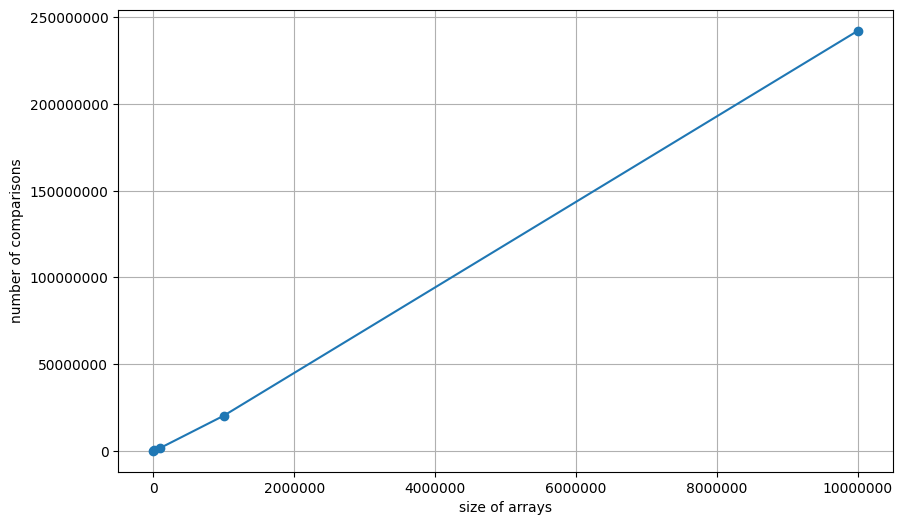

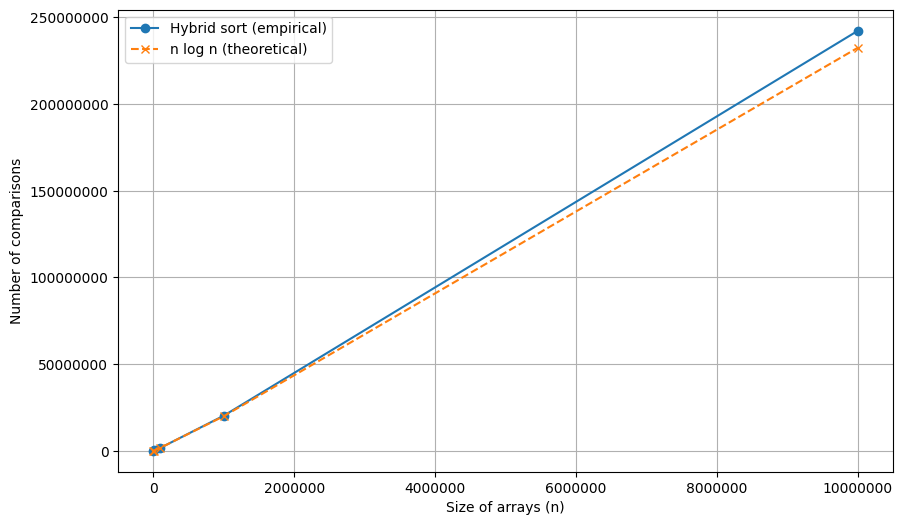

In [ ]:
part_c_i()

In [ ]:
def part_c_ii(): #fix n, vary S
  S_variables = [i for i in range(1, 64)]
  seed = 10
  comp_arr = []
  x = 10_000_000
  y = 0

  for S in S_variables:

    cnt_h = Counter()
    arr = random_array(10_000, seed + y, x)
    hybrid_sort(arr, S, cnt_h)
    comp_arr.append(cnt_h.c)
    y += 1


  plt.figure(figsize=(10,6))
  plt.xlabel("S values")
  plt.ylabel("number of comparisons")
  plt.plot(S_variables, comp_arr, marker = "o")
  plt.grid(True)
  plt.show()

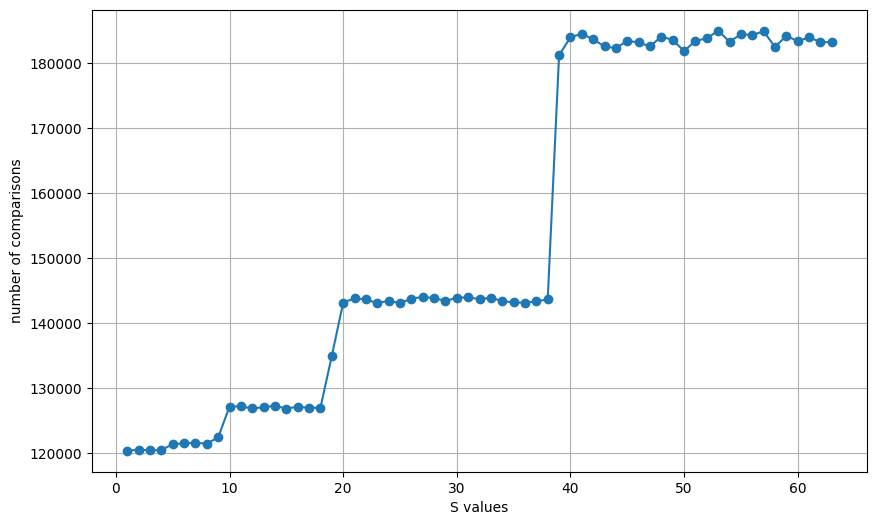

In [ ]:
part_c_ii()

In [ ]:
def part_c_iii():  # Pick S that minimizes comparisons AND check runtime

  sizes = [1000, 10_000, 100_000, 1_000_000]
  seed = 10              # same style as your part b
  x_max = 10_000_000
  TRIALS = 3
  S_variables = [i for i in range(1,65)]

  # Build trial base arrays first so every S sees identical inputs
  #base_arrays = [random_array(n, seed + y, x_max) for y in range(TRIALS)]

  comps = []
  times = []
  results = []

  for S in S_variables:
    total_comp = 0
    total_time = 0
    for n in sizes:
      for t in range(TRIALS):
        arr = random_array(n, seed + t, x_max)
        cnt = Counter()
        t0 = time.process_time()
        hybrid_sort(arr, S, cnt)
        t1 = time.process_time()
        total_comp += cnt.c
        total_time += (t1 - t0)
    comps.append(total_comp)
    times.append(total_time)
    results.append((S, total_comp, total_time))
    print(f"S={S:>3} | comparisons={int(comps[-1])} | time={times[-1]:.6f}s")

  plt.figure()
  plt.plot(S_variables, comps, marker = "o")
  plt.xlabel("S")
  plt.ylabel("comparisons")
  plt.grid(True)
  plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
  plt.show()

  plt.figure()
  plt.plot(S_variables, times, marker = "o")
  plt.xlabel("S")
  plt.ylabel("time (s)")
  plt.grid(True)
  plt.show()

  #Ranking
  sorted_times = sorted(results, key=lambda x: x[2])
  rank_times = {}
  for i, (S, c, t) in enumerate(sorted_times):
    rank_times[S] = i + 1

  sorted_comps = sorted(results, key=lambda x: x[1])
  rank_comps = {}
  for i, (S, c, t) in enumerate(sorted_comps):
    rank_comps[S] = i + 1

  ranked_results = []
  for S, c, t in results:
    combine_score = rank_comps[S] + rank_times[S]
    ranked_results.append((S, c, t, rank_comps[S], rank_times[S], combine_score))

  ranked_results.sort(key=lambda x: (x[5], x[4]))

  for i in ranked_results:
    print(f"S = {i[0]: <5} | comparisons = {i[1]: <15} | time = {i[2]: 12.6f}s | rank_comps = {i[3]: <8} | rank_times = {i[4]: <8} | combine_score = {i[5] : <8}")

  best_idx_comp = min(range(len(S_variables)), key=lambda i: comps[i])
  best_S_comp = S_variables[best_idx_comp]

  best_idx_time = min(range(len(S_variables)), key=lambda i: times[i])
  best_S_time = S_variables[best_idx_time]

  print("\n(c)(iii) Results:")
  print(f"Comparisons-optimal S (empirical): {best_S_comp}")
  print(f"Time-optimal S (empirical)       : {best_S_time}")
  print(f"Best overall S (ranked)          : {ranked_results [0][0]}" )



S=  1 | comparisons=61021294 | time=21.014198s
S=  2 | comparisons=61021294 | time=19.967232s
S=  3 | comparisons=61020509 | time=20.237981s
S=  4 | comparisons=61182484 | time=18.321003s
S=  5 | comparisons=61185596 | time=18.936530s
S=  6 | comparisons=61240450 | time=19.204309s
S=  7 | comparisons=61531574 | time=18.642181s
S=  8 | comparisons=62290316 | time=18.074887s
S=  9 | comparisons=62293384 | time=18.394172s
S= 10 | comparisons=62307090 | time=19.119883s
S= 11 | comparisons=62307090 | time=18.015389s
S= 12 | comparisons=62491642 | time=18.989506s
S= 13 | comparisons=62550348 | time=18.946568s
S= 14 | comparisons=62550348 | time=18.739437s
S= 15 | comparisons=64995946 | time=18.557452s
S= 16 | comparisons=66006960 | time=18.890841s
S= 17 | comparisons=66006960 | time=19.257416s
S= 18 | comparisons=66006960 | time=18.702666s
S= 19 | comparisons=66028663 | time=18.968908s
S= 20 | comparisons=66056219 | time=18.795897s
S= 21 | comparisons=66056219 | time=19.263253s
S= 22 | compa

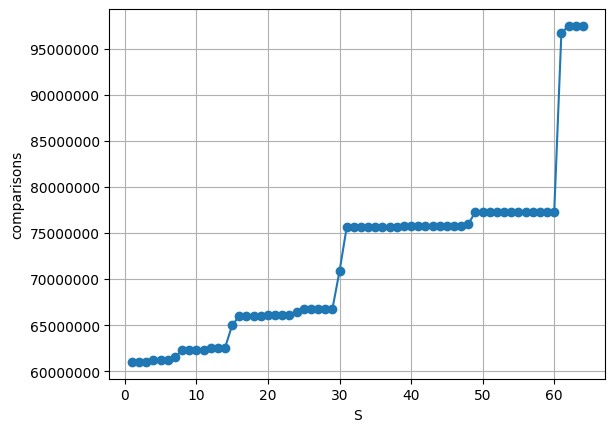

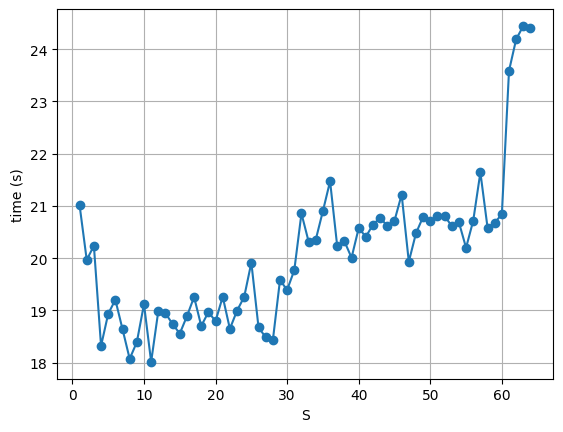

S = 4     | comparisons = 61182484        | time =    18.321003s | rank_comps = 4        | rank_times = 3        | combine_score = 7       
S = 8     | comparisons = 62290316        | time =    18.074887s | rank_comps = 8        | rank_times = 2        | combine_score = 10      
S = 11    | comparisons = 62307090        | time =    18.015389s | rank_comps = 11       | rank_times = 1        | combine_score = 12      
S = 9     | comparisons = 62293384        | time =    18.394172s | rank_comps = 9        | rank_times = 4        | combine_score = 13      
S = 7     | comparisons = 61531574        | time =    18.642181s | rank_comps = 7        | rank_times = 8        | combine_score = 15      
S = 5     | comparisons = 61185596        | time =    18.936530s | rank_comps = 5        | rank_times = 15       | combine_score = 20      
S = 15    | comparisons = 64995946        | time =    18.557452s | rank_comps = 15       | rank_times = 7        | combine_score = 22      
S = 14    | comparis

In [ ]:
part_c_iii()

S=  2 | insertion=0.000002s | merge=0.000003s
S=  3 | insertion=0.000002s | merge=0.000003s
S=  4 | insertion=0.000002s | merge=0.000004s
S=  5 | insertion=0.000002s | merge=0.000005s
S=  6 | insertion=0.000003s | merge=0.000006s
S=  8 | insertion=0.000004s | merge=0.000008s
S= 12 | insertion=0.000008s | merge=0.000014s
S= 16 | insertion=0.000012s | merge=0.000019s
S= 20 | insertion=0.000019s | merge=0.000026s
S= 24 | insertion=0.000025s | merge=0.000031s
S= 32 | insertion=0.000045s | merge=0.000043s
S= 48 | insertion=0.000097s | merge=0.000073s
S= 64 | insertion=0.000163s | merge=0.000104s
S= 96 | insertion=0.000369s | merge=0.000173s
S=128 | insertion=0.001070s | merge=0.000341s

Intersection at S ≈ 29.97, time ≈ 0.000040s


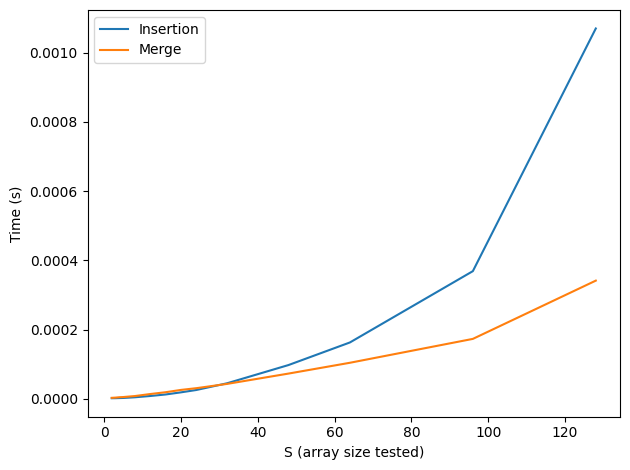

In [ ]:
def part_c_iii_runtime_plot():
    TRIALS = 5
    S_values = [2, 3, 4, 5, 6, 8, 12, 16, 20, 24, 32, 48, 64, 96, 128]
    seed0 = 123
    x_max_small = 10_000

    ins_times, mer_times = [], []

    ins_times, mer_times = [], []
    for S in S_values:
        t_ins = t_mer = 0.0
        for t in range(TRIALS):
            arr = random_array(S, seed0 + t, x_max_small)

            # insertion
            a = arr.copy(); ci = Counter()
            t0 = time.perf_counter(); insertion_sort(a, ci); t1 = time.perf_counter()
            t_ins += (t1 - t0)

            # merge
            b = arr.copy(); cm = Counter()
            t2 = time.perf_counter(); merge_sort(b, cm); t3 = time.perf_counter()
            t_mer += (t3 - t2)

        ins_times.append(t_ins / TRIALS)
        mer_times.append(t_mer / TRIALS)
        print(f"S={S:>3} | insertion={ins_times[-1]:.6f}s | merge={mer_times[-1]:.6f}s")

    # ===== NEW: intersection (S*, time*) with linear interpolation =====
    S_star = time_star = None
    for i in range(len(S_values) - 1):
        d0 = ins_times[i]   - mer_times[i]
        d1 = ins_times[i+1] - mer_times[i+1]

        if d0 == 0:
            # exact crossing at a sample point
            S_star   = S_values[i]
            time_star = ins_times[i]
            break

        if d0 * d1 < 0:
            # sign change -> crossing between i and i+1
            w = d0 / (d0 - d1)  # fraction from S[i] toward S[i+1]
            S_star    = S_values[i] + w * (S_values[i+1] - S_values[i])
            time_star = ins_times[i] + w * (ins_times[i+1] - ins_times[i])
            break

    if S_star is not None:
        print(f"\nIntersection at S ≈ {S_star:.2f}, time ≈ {time_star:.6f}s")
    else:
        print("\nNo intersection in the tested S range.")

    # ---- minimal plot ----
    plt.figure()
    plt.plot(S_values, ins_times, label="Insertion")
    plt.plot(S_values, mer_times, label="Merge")
    plt.xlabel("S (array size tested)")
    plt.ylabel("Time (s)")
    plt.legend()
    plt.tight_layout()
    plt.show()

part_c_iii_runtime_plot()


(d) Compare with original Mergesort

In [ ]:
def part_d():
  S = 9
  arr = random_array(10000000,10,1000)
  cnt_m = Counter()
  cnt_h = Counter()

  merge_startTime = time.time()
  merge_sort(arr.copy(),cnt_m)
  merge_endTime = time.time()
  merge_runTime = merge_endTime - merge_startTime

  hybrid_startTime = time.time()
  hybrid_sort(arr.copy(),S,cnt_h)
  hybrid_endTime = time.time()
  hybrid_runTime = hybrid_endTime - hybrid_startTime


  print("Number of key comparisons for Merge Sort: " + str(cnt_m.c))
  print("CPU time for Merge Sort: " + str(merge_runTime))
  print("Number of key comparisons for Hybrid Sort: " + str(cnt_h.c))
  print("CPU time for Hybrid Sort: " + str(hybrid_runTime))

In [ ]:
part_d()

Number of key comparisons for Merge Sort: 220041101
CPU time for Merge Sort: 77.91018438339233
Number of key comparisons for Hybrid Sort: 223086049
CPU time for Hybrid Sort: 69.35585594177246
